# **Introduction**
## Importing Modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
import requests,csv,os
from bs4 import BeautifulSoup
from sklearn.impute import KNNImputer
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

##Linking the notebook to Google drive

In [ ]:
# #linking the notebook to google drive to access the data
# from google.colab import drive
# drive.mount('/content/drive')

##Sourcing for the data

The Data being used in the notebook has been scrapped from [a website](https://www.buyrentkenya.com)

It has been diveded into  2 categories  ;

      The house price of acquiring a house saved as house_price
      The rent price of properties saved as rent_price


In [ ]:
# def sales_listing():
#     url_list = {
#     'https://www.buyrentkenya.com/houses-for-sale',
#     'https://www.buyrentkenya.com/flats-apartments-for-sale',
#     'https://www.buyrentkenya.com/commercial-property-for-sale',
#      'https://www.buyrentkenya.com/bedsitters-for-sale'
#       }
#     listings = []
#     for url in url_list:#288
#         for page_number in range(1,288):
#            page_url = url + str(page_number)
#            response = requests.get(url)
#            soup = BeautifulSoup(response.text, 'html.parser')
#            for listing in soup.find_all('div', class_='flex flex-col justify-between px-5 py-4 md:w-3/5'):
#              title = listing.find('h2',class_='font-semibold md:hidden').text.strip()
#              price = listing.find('div', class_='flex items-center justify-center text-xl font-bold leading-7 text-grey-900').text.strip()
#              location = listing.find('p', class_='ml-1 truncate text-sm font-normal capitalize text-grey-650').text.strip()
#              description = listing.find('a', class_='capitalize text-grey-850 no-underline').text.strip()
#              bedroom_element = listing.select_one('span[data-cy="card-beds"]')
#              bedroom = bedroom_element.text.strip() if bedroom_element else "N/A"
#              #bathroom = listing.find('div', data-cy== "card-bathrooms",class_='flex h-6 items-center rounded-full bg-highlight px-3 text-xs font-medium leading-5').text.strip()
#              bathroom_element = listing.select_one('span[data-cy="card-bathrooms"]')
#              bathroom = bathroom_element.text.strip() if bathroom_element else "N/A"
#              area_element = listing.select_one('span[data-cy="card-area"]')
#              area = area_element.text.strip() if area_element else "N/A"
#              listings.append({
#             'title': title,
#             'price': price,
#             'location': location,
#             'description': description,
#             'bedroom': bedroom,
#             'bathroom': bathroom,
#             'area': area
#              })

#     df = pd.DataFrame(listings)
#     filename = "housing_data"
#     df.to_csv(f"{filename}.csv", index=False)
#     print(f"Data saved to {filename}.csv")

#     # Get the absolute path of the saved CSV file
#     csv_path = os.path.abspath(f"{filename}.csv")
#     print(f"CSV file path: {csv_path}")

#     return csv_path



# def rent_listing():
#      url_list = {
#     'https://www.buyrentkenya.com/houses-for-rent',
#     'https://www.buyrentkenya.com/flats-apartments-for-rent',
#     'https://www.buyrentkenya.com/commercial-property-for-rent',
#     'https://www.buyrentkenya.com/bedsitters-for-rent'

#     }
#      listings = []
#      for url in url_list:#205
#         for page_number in range(1,205):
#            page_url = url + str(page_number)
#            response = requests.get(url)
#            soup = BeautifulSoup(response.text, 'html.parser')
#            for listing in soup.find_all('div', class_='flex flex-col justify-between px-5 py-4 md:w-3/5'):
#              title = listing.find('h2',class_='font-semibold md:hidden').text.strip()
#              price = listing.find('div', class_='flex items-center justify-center text-xl font-bold leading-7 text-grey-900').text.strip()
#              location = listing.find('p', class_='ml-1 truncate text-sm font-normal capitalize text-grey-650').text.strip()
#              description = listing.find('a', class_='capitalize text-grey-850 no-underline').text.strip()
#              bedroom_element = listing.select_one('span[data-cy="card-beds"]')
#              bedroom = bedroom_element.text.strip() if bedroom_element else "N/A"
#              #bathroom = listing.find('div', data-cy== "card-bathrooms",class_='flex h-6 items-center rounded-full bg-highlight px-3 text-xs font-medium leading-5').text.strip()
#              bathroom_element = listing.select_one('span[data-cy="card-bathrooms"]')
#              bathroom = bathroom_element.text.strip() if bathroom_element else "N/A"
#              area_element = listing.select_one('span[data-cy="card-area"]')
#              area = area_element.text.strip() if area_element else "N/A"
#              listings.append({
#             'title': title,
#             'price': price,
#             'location': location,
#             'description': description,
#             'bedroom': bedroom,
#             'bathroom': bathroom,
#             'area': area
#              })

#      df = pd.DataFrame(listings)
#      filename = "rent_listing"
#      df.to_csv(f"{filename}.csv", index=False)
#      print(f"Data saved to {filename}.csv")

#      # Get the absolute path of the saved CSV file
#      csv_path = os.path.abspath(f"{filename}.csv")
#      print(f"CSV file path: {csv_path}")
#      return csv_path



# if __name__ == "__main__":
#     sales_listing()
#     rent_listing()

##Importing and loading the data into the notebook

In [ ]:
rent_data=pd.read_csv("/content/drive/MyDrive/rent_listing.csv")

# **Cleaning the data**

In [ ]:
#Viewing the first 5 row of the data
rent_data.head()

,title,price,location,description,bedroom,bathroom,area
0,4 Bed Apartment with En Suite in Riverside,"KSh 160,000\n\n/ month","Riverside, Westlands",Unfurnished 4 Bedroom Apartment +Dsq In Rivers...,4.0,5.0,200 m²
1,Furnished 3 Bed Apartment with En Suite in Bro...,"KSh 320,000\n\n/ month","Brookside, Westlands",Furnished 3-Bedroom Apartment for Rent in Broo...,3.0,3.0,140 m²
2,Furnished 2 Bed Apartment with En Suite in Kil...,"KSh 180,000\n\n/ month",Kileleshwa,Executive 2 Bedroom fully furnished apartment ...,2.0,NaN,NaN
3,4 Bed Apartment with En Suite in Riverside,"KSh 325,000\n\n/ month","Riverside, Westlands",Modern 4 Bedroom all en-suite Duplex Apartment...,4.0,4.0,NaN
4,Serviced 1 Bed Apartment with En Suite at West...,"KSh 180,000\n\n/ month","Westlands, Westlands Area",1 bedroom fully furnished and serviced apartme...,1.0,1.0,NaN


In [ ]:
#Getting the basic information on the data
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13260 entries, 0 to 13259
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        13260 non-null  object 
 1   price        13260 non-null  object 
 2   location     13260 non-null  object 
 3   description  13260 non-null  object 
 4   bedroom      7344 non-null   float64
 5   bathroom     6732 non-null   float64
 6   area         3468 non-null   object 
dtypes: float64(2), object(5)
memory usage: 725.3+ KB


In [ ]:
#Checking for null values
rent_data.isna().sum()

,0
title,0
price,0
location,0
description,0
bedroom,5916
bathroom,6528
area,9792


In [ ]:
#Getting the description of the data
rent_data.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroom,7344.0,3.194444,1.350389,1.0,2.0,3.0,4.0,6.0
bathroom,6732.0,3.303030,1.336872,1.0,2.0,3.0,4.0,6.0


Here, we can notice the only two feauteres are of float type, bedroom and bathroom, but this shouldn't be the case
we have to convert the price and area into float types

In [ ]:
#Removing Ksh,/,n,\ from the price column and converting the column into a float type
rent_data['price'] = rent_data['price'].astype(str).str.replace('KSh ', '').str.replace('/ month', '').str.replace(',', '').astype(float)
rent_data.head()

,title,price,location,description,bedroom,bathroom,area
0,4 Bed Apartment with En Suite in Riverside,160000.0,"Riverside, Westlands",Unfurnished 4 Bedroom Apartment +Dsq In Rivers...,4.0,5.0,200 m²
1,Furnished 3 Bed Apartment with En Suite in Bro...,320000.0,"Brookside, Westlands",Furnished 3-Bedroom Apartment for Rent in Broo...,3.0,3.0,140 m²
2,Furnished 2 Bed Apartment with En Suite in Kil...,180000.0,Kileleshwa,Executive 2 Bedroom fully furnished apartment ...,2.0,NaN,NaN
3,4 Bed Apartment with En Suite in Riverside,325000.0,"Riverside, Westlands",Modern 4 Bedroom all en-suite Duplex Apartment...,4.0,4.0,NaN
4,Serviced 1 Bed Apartment with En Suite at West...,180000.0,"Westlands, Westlands Area",1 bedroom fully furnished and serviced apartme...,1.0,1.0,NaN


In [ ]:
#Creating a loop that will go through every entry of area and convert into a float after droping
area  = rent_data['area'].copy()

for i in range(len(area)):
  if isinstance(area[i], str) and 'ft²' in area[i]: #Check if the value is a string before checking for 'ft²'
    area[i] = area[i].replace('ft²', '')
  elif isinstance(area[i], str) and 'm²' in area[i]:
    area[i] = float(area[i].replace('m²', '')) * 10.7639 #converts m² to ft²


rent_data['area'] = area
rent_data.head()



,title,price,location,description,bedroom,bathroom,area
0,4 Bed Apartment with En Suite in Riverside,160000.0,"Riverside, Westlands",Unfurnished 4 Bedroom Apartment +Dsq In Rivers...,4.0,5.0,2152.78
1,Furnished 3 Bed Apartment with En Suite in Bro...,320000.0,"Brookside, Westlands",Furnished 3-Bedroom Apartment for Rent in Broo...,3.0,3.0,1506.946
2,Furnished 2 Bed Apartment with En Suite in Kil...,180000.0,Kileleshwa,Executive 2 Bedroom fully furnished apartment ...,2.0,NaN,NaN
3,4 Bed Apartment with En Suite in Riverside,325000.0,"Riverside, Westlands",Modern 4 Bedroom all en-suite Duplex Apartment...,4.0,4.0,NaN
4,Serviced 1 Bed Apartment with En Suite at West...,180000.0,"Westlands, Westlands Area",1 bedroom fully furnished and serviced apartme...,1.0,1.0,NaN


From, the title we can see that the type of property has been listed
Using this information we can create a new column "property_type" that can tell us wherether the type of property is either a bedsitter, office, house ,apartment or other

In [ ]:
# Creating a new column 'property_type'
property_types = []
for title in rent_data['title']:
  if 'Apartment' in title:
    property_types.append('Apartment')
  elif 'House' in title:
    property_types.append('House')
  elif 'Office' in title:
    property_types.append('Office')
  elif 'Bedsitter' in title:
    property_types.append('Bedsitter')
  else:
    property_types.append('Other') # Catch-all for titles without those keywords

rent_data['property_type'] = property_types

rent_data.head()



,title,price,location,description,bedroom,bathroom,area,property_type
0,4 Bed Apartment with En Suite in Riverside,160000.0,"Riverside, Westlands",Unfurnished 4 Bedroom Apartment +Dsq In Rivers...,4.0,5.0,2152.78,Apartment
1,Furnished 3 Bed Apartment with En Suite in Bro...,320000.0,"Brookside, Westlands",Furnished 3-Bedroom Apartment for Rent in Broo...,3.0,3.0,1506.946,Apartment
2,Furnished 2 Bed Apartment with En Suite in Kil...,180000.0,Kileleshwa,Executive 2 Bedroom fully furnished apartment ...,2.0,NaN,NaN,Apartment
3,4 Bed Apartment with En Suite in Riverside,325000.0,"Riverside, Westlands",Modern 4 Bedroom all en-suite Duplex Apartment...,4.0,4.0,NaN,Apartment
4,Serviced 1 Bed Apartment with En Suite at West...,180000.0,"Westlands, Westlands Area",1 bedroom fully furnished and serviced apartme...,1.0,1.0,NaN,Apartment


In [ ]:
label_encoder = LabelEncoder()

# Fit the encoder to the 'property_type' column
label_encoder.fit(rent_data['property_type'])

# Transform the 'property_type' column to numerical values
rent_data['property_type_encoded'] = label_encoder.transform(rent_data['property_type'])

rent_data.head()

,title,price,location,description,bedroom,bathroom,area,property_type,property_type_encoded
0,4 Bed Apartment with En Suite in Riverside,160000.0,"Riverside, Westlands",Unfurnished 4 Bedroom Apartment +Dsq In Rivers...,4.0,5.0,2152.78,Apartment,0
1,Furnished 3 Bed Apartment with En Suite in Bro...,320000.0,"Brookside, Westlands",Furnished 3-Bedroom Apartment for Rent in Broo...,3.0,3.0,1506.946,Apartment,0
2,Furnished 2 Bed Apartment with En Suite in Kil...,180000.0,Kileleshwa,Executive 2 Bedroom fully furnished apartment ...,2.0,NaN,NaN,Apartment,0
3,4 Bed Apartment with En Suite in Riverside,325000.0,"Riverside, Westlands",Modern 4 Bedroom all en-suite Duplex Apartment...,4.0,4.0,NaN,Apartment,0
4,Serviced 1 Bed Apartment with En Suite at West...,180000.0,"Westlands, Westlands Area",1 bedroom fully furnished and serviced apartme...,1.0,1.0,NaN,Apartment,0


In [ ]:
# Get value counts of "location" column
rent_data["location"].value_counts()



,count
location,
"Westlands Area, Westlands",1836
"Runda, Westlands",1836
"Riverside, Westlands",612
Kileleshwa,612
"Westlands, Westlands Area",408
"General Mathenge, Westlands",408
"Brookside, Westlands",408
"Rosslyn, Westlands",408
"Kyuna, Westlands",204


From the location we can notice that some entries have different variations such as 'Westlands Area, Westlands' , 'Runda, Westlands' all of them being in Westlands
The code below has been used to standardize this

In [ ]:
def clean_location(location):

    if 'Westlands' in location:
        location = 'Westlands'

    if 'Kileleshwa' in location:
        location = 'Kileleshwa'

    if 'Kilimani' in location:
        location = 'Kilimani'

    if 'Ruiru' in location:
        location = 'Ruiru'

    if 'Nairobi CBD' in location:
        location = 'Nairobi CBD'

    if 'Industrial Area' in location:
        location = 'Industrial Area'

    if 'Upper Hill' in location:
        location = 'Upper Hill'

    if 'Karen' in location:
        location = 'Karen'

    if 'Muthaiga' in location:
        location = 'Muthaiga'

    if 'Siaya' in location:
        location = 'Siaya'

    if 'Ongata Rongai' in location:
        location = 'Ongata Rongai'

    if 'Ngong' in location:
        location = 'Ngong'

    if 'Kibra' in location:
        location = 'Kibra'

    if 'Kawangware' in location:
        location = 'Kawangware'

    if 'Kariobangi' in location:
        location = 'Kariobangi'

    if 'Kikuyu' in location:
        location = 'Kikuyu'

    if 'Nyali' in location:
        location = 'Nyali'


    return location



rent_data['location'] = rent_data['location'].apply(clean_location)

In [ ]:
rent_data["location"].value_counts()

,count
location,
Westlands,7752
Kileleshwa,1020
Ruiru,612
Kilimani,408
Upper Hill,408
Karen,408
Muthaiga,204
Kawangware,204
Ngong,204


Still on the location i noticed 3 places that weren't supposed to be in the dataset (Nyali, Siaya and Kikuyu) so we remove them

In [ ]:
#Define a list of locations to be dropped
locations_to_drop = ['Nyali', 'Kikuyu', 'Siaya']

#Filter the DataFrame to remove the specified locations

rent_data = rent_data[~rent_data['location'].isin(locations_to_drop)]

#Reset the index of the DataFrame after filtering
rent_data = rent_data.reset_index(drop=True)

In [ ]:
rent_data["location"].value_counts()

,count
location,
Westlands,7752
Kileleshwa,1020
Ruiru,612
Kilimani,408
Upper Hill,408
Karen,408
Redhill,204
Nairobi CBD,204
Industrial Area,204


In [ ]:
rent_data.isna().sum()

,0
title,0
price,0
location,0
description,0
bedroom,5304
bathroom,5916
area,9588
property_type,0
property_type_encoded,0


In [ ]:
#illing th null values using an algorithim from sklearn
imputer=KNNImputer(n_neighbors=3)
imputing=['bedroom','bathroom','area']
rent_data[imputing]=imputer.fit_transform(rent_data[imputing])

In [ ]:
rent_data.isnull().sum()

,0
title,0
price,0
location,0
description,0
bedroom,0
bathroom,0
area,0
property_type,0
property_type_encoded,0


#Explotary Data analysis

In [ ]:
rent_data.head()

,title,price,location,description,bedroom,bathroom,area,property_type,property_type_encoded
0,4 Bed Apartment with En Suite in Riverside,160000.0,Westlands,Unfurnished 4 Bedroom Apartment +Dsq In Rivers...,4.0,5.0,2152.780,Apartment,0
1,Furnished 3 Bed Apartment with En Suite in Bro...,320000.0,Westlands,Furnished 3-Bedroom Apartment for Rent in Broo...,3.0,3.0,1506.946,Apartment,0
2,Furnished 2 Bed Apartment with En Suite in Kil...,180000.0,Kileleshwa,Executive 2 Bedroom fully furnished apartment ...,2.0,2.0,1722.224,Apartment,0
3,4 Bed Apartment with En Suite in Riverside,325000.0,Westlands,Modern 4 Bedroom all en-suite Duplex Apartment...,4.0,4.0,2152.780,Apartment,0
4,Serviced 1 Bed Apartment with En Suite at West...,180000.0,Westlands,1 bedroom fully furnished and serviced apartme...,1.0,1.0,430.556,Apartment,0


In [ ]:
rent_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,12648.0,234091.661290,193530.923661,155.0000,75000.000,180000.000000,340000.000000,819000.0
bedroom,12648.0,3.188620,1.081504,1.0000,3.000,3.194444,4.000000,6.0
bathroom,12648.0,3.254154,1.148255,1.0000,3.000,3.303030,4.000000,6.0
area,12648.0,2506.306293,1822.293451,344.4448,1722.224,2152.780000,3104.005687,14000.0
property_type_encoded,12648.0,1.709677,1.430002,0.0000,0.000,2.000000,3.000000,4.0


In [ ]:
min_price = np.min(rent_data['price'])
max_price = np.max(rent_data['price'])
print(f"The price range is from {min_price} to {max_price}")

The price range is from 155.0 to 737500.0


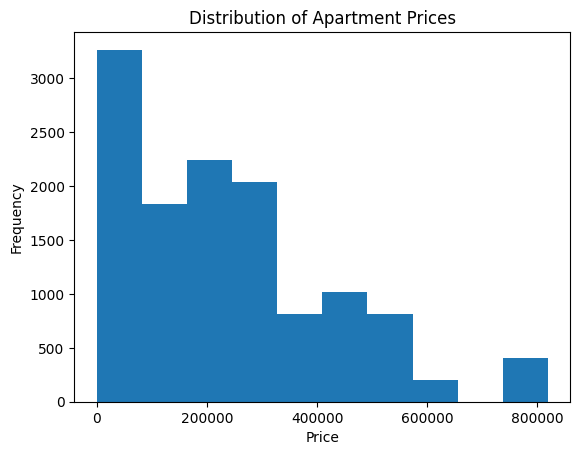

In [ ]:
plt.hist(rent_data['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Apartment Prices')
plt.show()

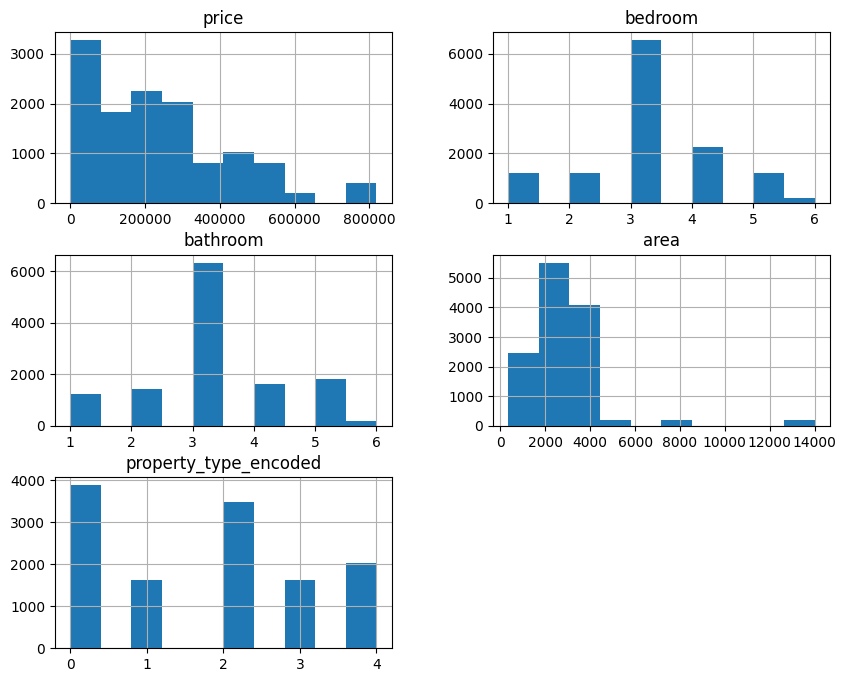

In [ ]:
rent_data.hist(figsize=(10, 8))
plt.show()

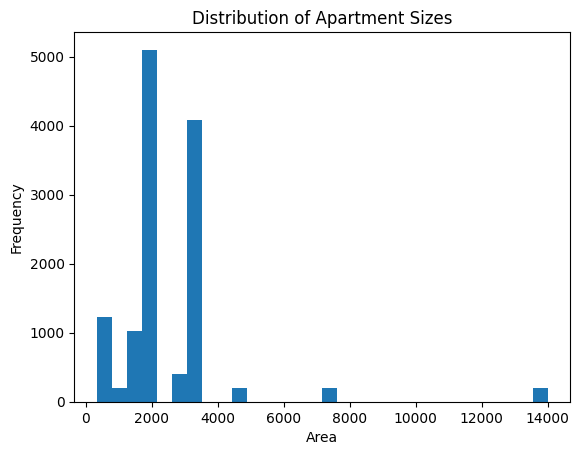

In [ ]:
import matplotlib.pyplot as plt

plt.hist(rent_data['area'], bins=30)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Distribution of Apartment Sizes')
plt.show()

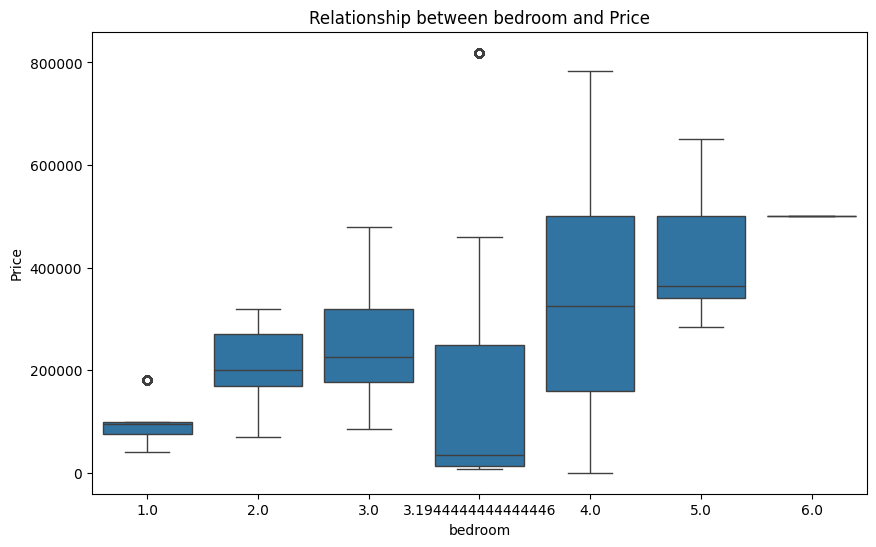

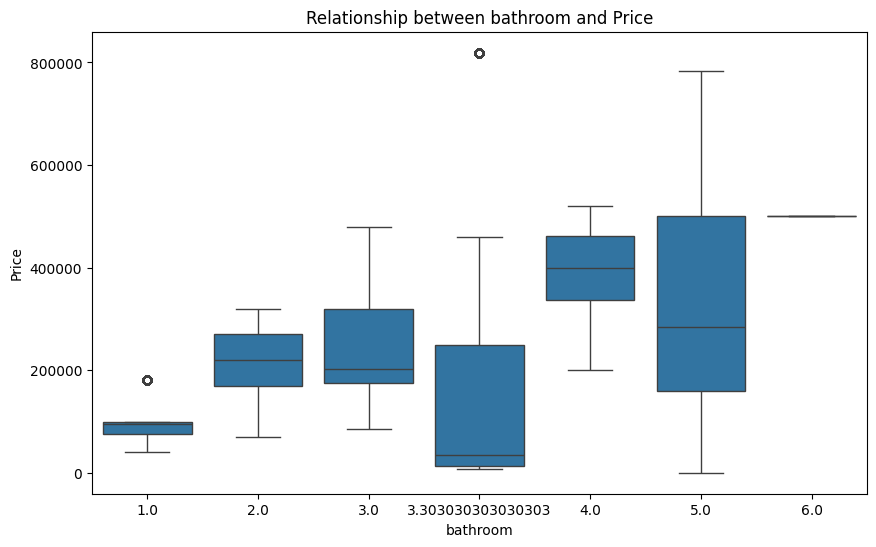

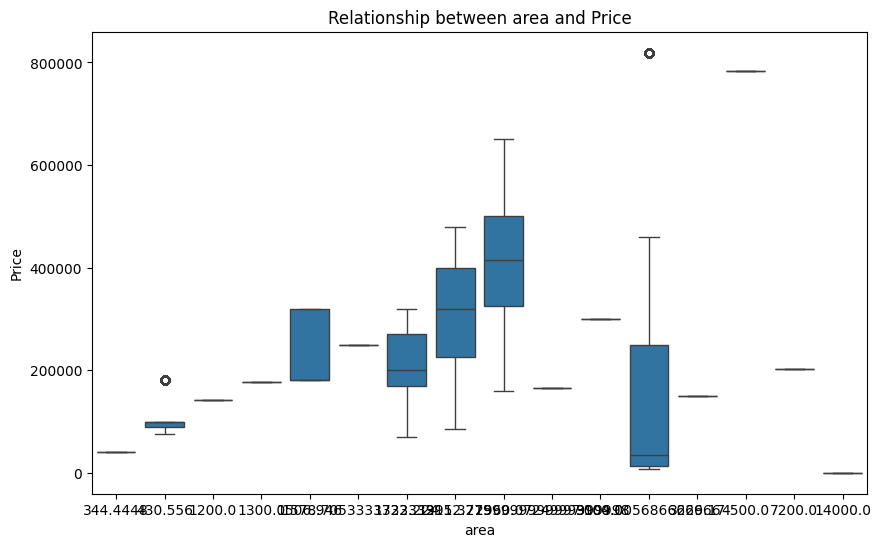

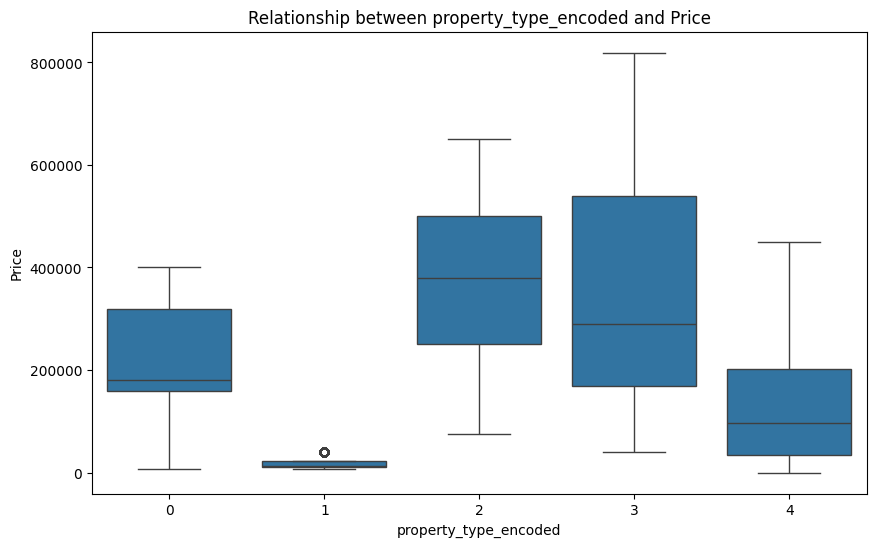

In [ ]:
visualize = ['bedroom', 'bathroom', 'area', 'property_type_encoded']

for feature in visualize:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=feature, y='price', data=rent_data)
  plt.xlabel(feature)
  plt.ylabel('Price')
  plt.title(f'Relationship between {feature} and Price')
  plt.show()

In [ ]:
rent_data_num = rent_data.select_dtypes(exclude = ['object'])
rent_data_num

,price,bedroom,bathroom,area,property_type_encoded
0,160000.0,4.000000,5.00000,2152.780000,0
1,320000.0,3.000000,3.00000,1506.946000,0
2,180000.0,2.000000,2.00000,1722.224000,0
3,325000.0,4.000000,4.00000,2152.780000,0
4,180000.0,1.000000,1.00000,430.556000,0
...,...,...,...,...,...
12643,13000.0,3.194444,3.30303,3104.005687,1
12644,8000.0,3.194444,3.30303,3104.005687,1
12645,14000.0,3.194444,3.30303,3104.005687,1
12646,13000.0,3.194444,3.30303,3104.005687,1


In [ ]:
property_type_mapping = dict(zip(rent_data['property_type_encoded'], rent_data['property_type'])) # Changed 'original_property_type' to 'property_type'

for encoded_value, original_value in property_type_mapping.items():
    print(f'{encoded_value}: {original_value}')

0: Apartment
3: Office
4: Other
2: House
1: Bedsitter


In [ ]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to the 'property_type' column
label_encoder.fit(rent_data['location'])

# Transform the 'property_type' column to numerical values
rent_data['location_encoded'] = label_encoder.transform(rent_data['location'])

In [ ]:
# Get the mapping between encoded values and original locations
location_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# Print the mapping
for encoded_value, location in location_mapping.items():
    print(f'{encoded_value}: {location}')

0: Changamwe
1: Industrial Area
2: Karen
3: Kawangware
4: Kileleshwa
5: Kilimani
6: Lavington
7: Muthaiga
8: Nairobi CBD
9: Ngong
10: Ongata Rongai
11: Redhill
12: Ruaka
13: Ruiru
14: Upper Hill
15: Westlands


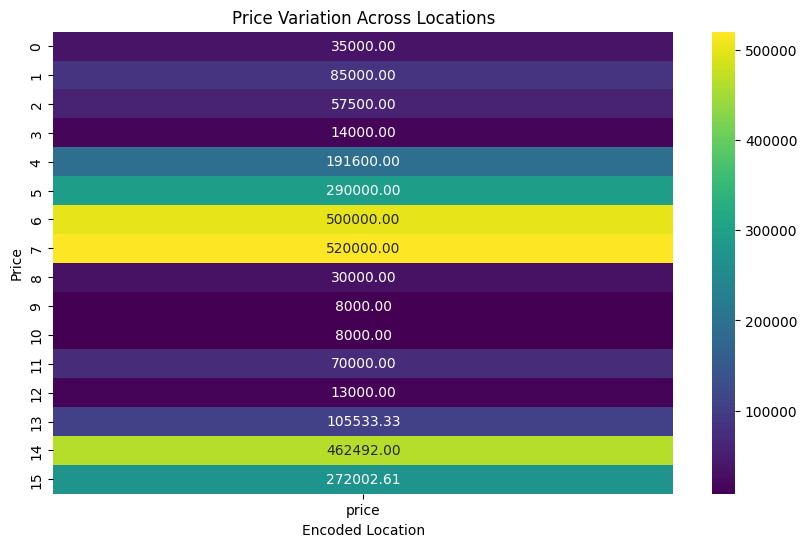

In [ ]:
pivot_table = rent_data.pivot_table(values='price', index='location_encoded', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="viridis")
plt.xlabel("Encoded Location")
plt.ylabel("Price")
plt.title("Price Variation Across Locations")
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

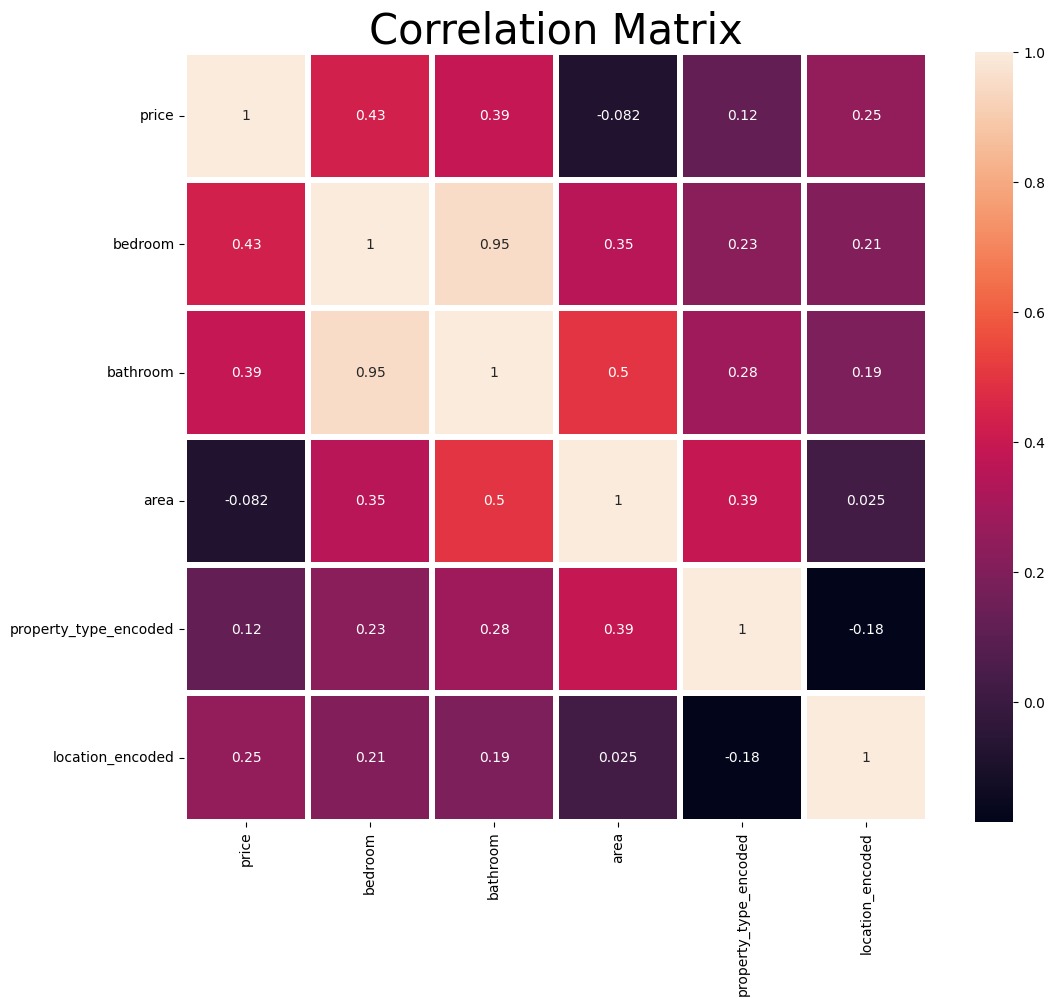

In [ ]:
corr_matrix=rent_data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,fmt='.2g',linewidths=4)
plt.title('Correlation Matrix',fontsize=30)

In [ ]:
def handle_outliers(data, columns):
    for column in columns:
        if column in data.columns:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1
            low_b = q1 - 1.5 * iqr
            high_b = q3 + 1.5 * iqr

            outliers = (data[column] < low_b) | (data[column] > high_b)

            if outliers.any():
                print(f"{column}: has outliers")
                data[column] = np.where(data[column] < low_b, low_b,
                                    np.where(data[column] > high_b, high_b, data[column]))
            else:
                print(f"{column}: no outliers")

    return data

num_col = rent_data.select_dtypes(include='number').columns
rent_data = handle_outliers(rent_data, num_col)

price: has outliers
bedroom: has outliers
bathroom: has outliers
area: has outliers
property_type_encoded: no outliers
location_encoded: no outliers


#Model creation

##Feature and target segregation

In [ ]:
X = rent_data.drop(['price', 'title', 'description','location', 'property_type'], axis=1)
y = rent_data['price']

##Standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=StandardScaler()
X_scale=scale.fit_transform(X)


In [ ]:
X[X.columns] = scale.fit_transform(X[X.columns])

##Splitting the data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

##Building the model


###Linear Regression

In [ ]:
mymodel=LinearRegression()
mymodel.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict = mymodel.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 24852004958.707794
R^2 Score: 0.2867238538118857


###Random Forest

In [ ]:
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_predict = rf_clf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 5411400790.513834
R^2 Score: 0.8446876576859609


XGBooster

In [ ]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

#xg_reg.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'alpha': [0, 10, 50]
}

# Initialize GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print(f"Best parameters found: {best_params}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters found: {'alpha': 10, 'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}


In [ ]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
#y_predict = mymodel.predict(X_test)
y_predict = xg_reg.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2614262912.720659
R^2 Score: 0.9249681714370275


In [ ]:
predictions = xg_reg.predict(X_test)

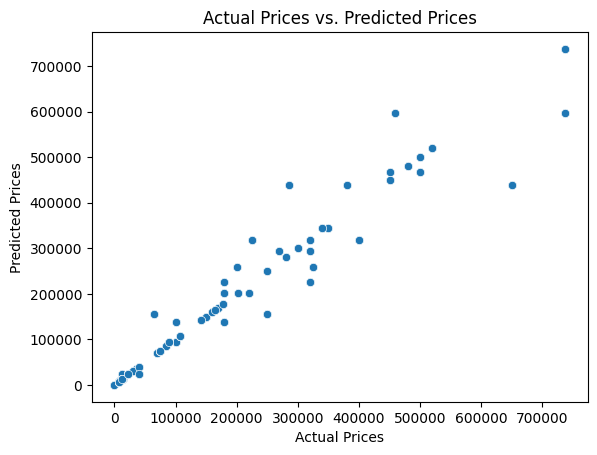

In [ ]:
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()